In [1]:
# import libraries and modules
import acquire
import prepare
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

pd.options.display.max_columns = None



In [2]:
# Acquire data 
df = acquire.get_telco_data_signup()  # Import data using acquire file
print('Rows, Columns ',df.shape,'\n') #View shape of df
print(df.columns) #View column names

Rows, Columns  (7043, 26) 

Index(['customer_id', 'payment_type_id', 'internet_service_type_id',
       'contract_type_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type', 'churn_month', 'signup_date'],
      dtype='object')


In [3]:
df, customer_id = prepare.prep_telco(df) # Clean df
df.churn_month = pd.to_datetime(df.churn_month)
df.signup_date = pd.to_datetime(df.signup_date)

In [4]:
#split data into full, train, validate, test
full, train, X_train, y_train, X_val, y_val, X_test, y_test = prepare.split_data(df,'churn') 

In [16]:
import matplotlib.pyplot as plt
month_bins = ['2016-01-01','2016-07-01','2017-01-01','2017-07-01',
            '2018-01-01','2018-07-01','2019-01-01','2019-07-01',
            '2020-01-01','2020-07-01', '2021-01-01','2021-07-01','2022-01-01','2022-07-01']

<AxesSubplot:>

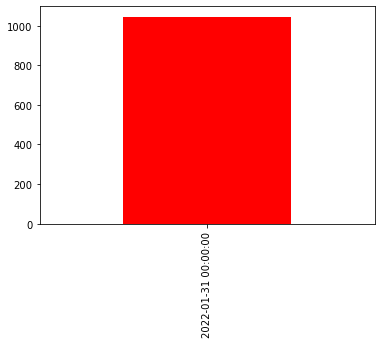

In [6]:
train.churn_month.value_counts().plot(kind='bar',color='red')

In [7]:
train.signup_date.value_counts(bins=20).sort_index()

(2016-01-19 13:31:05.199999999, 2016-05-10 08:31:34]    414
(2016-05-10 08:31:34, 2016-08-27 22:55:34]              183
(2016-08-27 22:55:34, 2016-12-15 13:19:34]              137
(2016-12-15 13:19:34, 2017-04-04 03:43:34]              158
(2017-04-04 03:43:34, 2017-07-22 18:07:34]              159
(2017-07-22 18:07:34, 2017-11-09 08:31:34]              124
(2017-11-09 08:31:34, 2018-02-26 22:55:34]              148
(2018-02-26 22:55:34, 2018-06-16 13:19:34]               97
(2018-06-16 13:19:34, 2018-10-04 03:43:34]              153
(2018-10-04 03:43:34, 2019-01-21 18:07:34]              128
(2019-01-21 18:07:34, 2019-05-11 08:31:34]              119
(2019-05-11 08:31:34, 2019-08-28 22:55:34]              159
(2019-08-28 22:55:34, 2019-12-16 13:19:34]              129
(2019-12-16 13:19:34, 2020-04-04 03:43:34]              198
(2020-04-04 03:43:34, 2020-07-22 18:07:34]              179
(2020-07-22 18:07:34, 2020-11-09 08:31:34]              148
(2020-11-09 08:31:34, 2021-02-26 22:55:3

In [8]:
train.churn_month.value_counts()

2022-01-31    1046
Name: churn_month, dtype: int64

<AxesSubplot:>

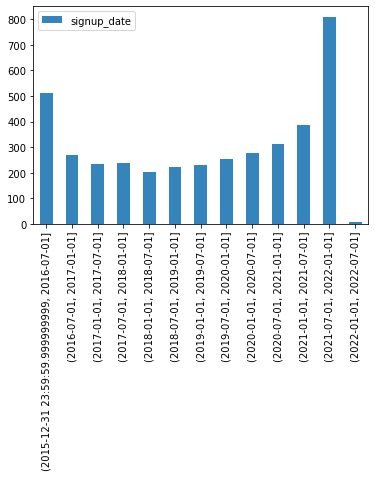

In [11]:
train.signup_date.value_counts(bins=pd.to_datetime(month_bins)).sort_index().plot(kind='bar',alpha=.9,legend=True)

<AxesSubplot:>

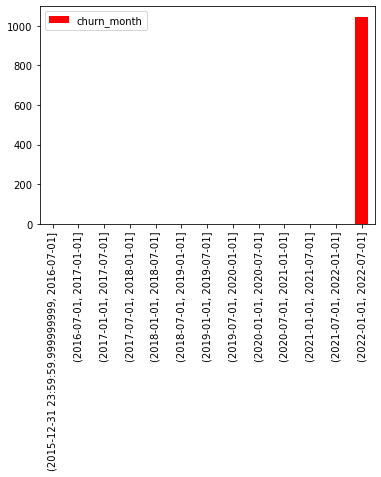

In [15]:
train.churn_month.value_counts(bins=pd.to_datetime(month_bins)).sort_index().plot(kind='bar',color='red',legend=True)

In [31]:
x_ticks = ['Jan 1, 2016','','','',
            '','','Jan 1, 2019','',
            '','', '','','Jan 31, 2022','']

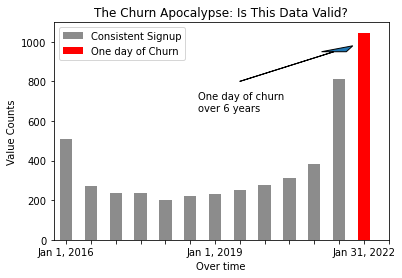

In [93]:
train.signup_date.value_counts(bins=pd.to_datetime(month_bins)).sort_index().plot(kind='bar',color ='grey',alpha=.9,label='Consistent Signup')
train.churn_month.value_counts(bins=pd.to_datetime(month_bins)).sort_index().plot(kind='bar',color='red',label='One day of Churn')
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13], labels=x_ticks,rotation=0)
plt.xlabel('Over time')
plt.ylabel('Value Counts')
plt.title('The Churn Apocalypse: Is This Data Valid?')
plt.arrow(7,800,3.8,150,head_width=1, head_length=30)
plt.text(5.3,650,'One day of churn \nover 6 years')
plt.legend()
plt.savefig('churn_apocalypse.png')
plt.show()

In [92]:
plt.savefig('churn_apocalypse.png')

<Figure size 432x288 with 0 Axes>

day of churn =  2022-01-31  
signups = 2016-01-19 - 2022-01-21

In [ ]:
train.signup_date.value_counts(bins=pd.to_datetime(month_bins))

Do customers with higher monthly_charges churn at a different rate?  
Do customers with a partner or dependents churn at a different rate?  
What month are customers most likely to churn?


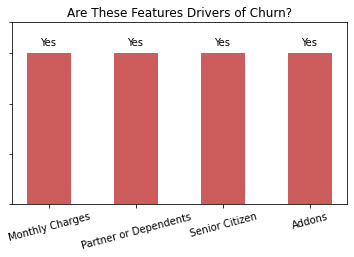

In [128]:
plt.bar(['Monthly Charges','Partner or Dependents','Senior Citizen','Addons'],[1,1,1,1],width=.5, color = 'indianred')
plt.title('Are These Features Drivers of Churn?')
plt.yticks(ticks = [0,.33,.66,1,1.2], labels = ['','','','',''])
plt.xticks(rotation=15)
plt.text(-.1,1.05,'Yes')
plt.text(.9,1.05,'Yes')
plt.text(1.9,1.05,'Yes')
plt.text(2.9,1.05,'Yes')
plt.gcf().subplots_adjust(bottom=0.25)
plt.savefig('churn_drivers.png')
plt.show()